# DUN10 05-19
## Dwuwymiarowe odwzorowania

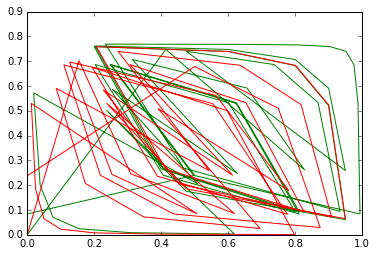

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dim = 2
N = 10000

def dysypatywne(r, a):
    x, y = r
    y = a*y
    if x > 0.5:
        y += 0.5
    return np.array([(2*x)%1, y])

def run(odwz, N, a, r):
    r = np.array(r)
    r_history = np.zeros((N, dim))
    
    for i in range(1,N):
        r = odwz(r, a)
        r_history[i] = r
    
    x, y = r_history.T
    plt.plot(x,y, "-")

a = 0.35
for i in np.arange(1,5)**-0.5:
    run(dysypatywne, N, a, [i, i])

Odwzorowanie jest dysypatywne gdy jakobian jest < 1

Pierwsza rownosc w `dysypatywne`: Bernoulli, $\lambda_x = \ln(2)$ > 0
Druga: $\lambda_y = \ln(a) < 0$


### Odwzorowanie kota Arnolda
348-orbita i wraca do tego samego kota *(up to szum na floatach $10^{-16}$

/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars


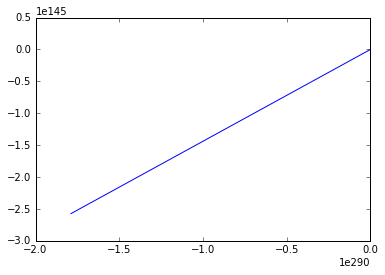

In [28]:
def henon(r, params):
    mu, b = params
    x, y = r
    return np.array([1-mu*x**2+y, b*x])

b=1
for i in np.arange(0.2, , 0.01):
    run(henon, int(N/100), [i, 1], [0.3,0.3])

Jakobian Henona: [[-2 mu x, 1], [ b, 0]], wychodzi b: dla b = 1 dostajemy zachowawcze odwzorowanie

Znajdujemy punkty stale, wsadzamy je z taylorowskimi wariacjami do odwzorowania, linearyzujemy, dostajemy liniowego Henona dla zaburzen

In [29]:
linear_henon = lambda x, mu, b: np.array([[-2*mu*x, 1],[b, 0]])
r = np.array([0.01, 0.01])
for i in range(10):
    r = linear_henon(0.5,0.3,1)@r
    print(r)

[ 0.007  0.01 ]
[ 0.0079  0.007 ]
[ 0.00463  0.0079 ]
[ 0.006511  0.00463 ]
[ 0.0026767  0.006511 ]
[ 0.00570799  0.0026767 ]
[ 0.0009643   0.00570799]
[ 0.0054187  0.0009643]
[-0.00066131  0.0054187 ]
[ 0.00561709 -0.00066131]


Linearyzacja realizuje odwzorowanie w plaszczyznie stycznej do przestrzeni fazowej ukladu - przystawia w danym punkcie do powierzchni naszej N-wymiarowej przestrzeni fazowej plaszczyzne w N wymiarach i przesuwa nasz punkt wzdluz tej plaszczyzny.

Diagonalizujemy macierz, znajdujac wartosci wlasne.

### Klasyfikacja punktow stalych
1. Obydwie |$\lambda_i$| < 1: punkt staly stabilny, dren, sciek
2. Obydwie |$\lambda_i$| > 1: punkt staly niestabilny: zrodlo
3. Jedna mod wieksza, druga mod mniejsza: punkt siodlowy (siodlo hiperboliczne) z dwoma kierunkami rozbieznymi i dwoma zbieznymi (*podprzestrzen sciagajaca i rozciagajaca*). Siodlo konskie lub przelecz. Uklady hiperboliczne, ale nie wszystkie z nich sa hiperboliczne.

(*$|\lambda_i| = 1$ w punkcie bifurkacji*)

W N-wymiarach - przestrzenie sciagajace

W ogolnosci: zespolone wartosci wlasne: ogniska **(niestabilnosci w plazmie?)**



Podsumowujac zlinearyzowane 2D:
* Stabilne, niestabilne
* Punkty, spirale
LUB
siodlo

det DJ jako funkcja ( tr DJ), DJ - zlinearyzowany jakobian

Punkty siodlowe: styk dwoch podprzestrzeni niezmienniczych, przyciagajacej i odpychajacej

Dla zlinearyzowanego Henona wektory

[1, 0] - niestabilny

[0, 1] - stabilny

### Daleko od siodla

Rozmaitosci - uogolnione krzywe niezmiennicze. Moga byc plaszczyznami

### Dygresja o rozmaitosciach
### TO SAMO CO MANIFOLD

Algebra: zaklada liniowe zaleznozsci. Ale zwykle problemy sa nieliniowe. Wystarczy powierzchnia kuli S2, zeby problem byl problematyczny - ale mozna ja lokalnie przyblizyc plaszczyzna euklidesowa. Takie rzeczy nazywamy wlasnie rozmaitosciami.
Wymiar rozmaitosci: wymiar przestrzeni ktora mozna wykorzystac jako rozmaitosc. Np. kule przyblizamy dwuwymiarowa plaszyzna, wiec to jest dwuwymiarowa rozmaitosc

**Skrzyzowanie homokliniczne** - przeciecie rozmaitosci (nie trajektorii!) stabilnej i niestabilnej.  Gdyby to byly przeciecia trajektorii to rozwiazania rownan rozniczkowych tracilyby jednoznacznosc.

**Splot homokliniczny** - jesli skrzyzowanie zaszlo raz to muzi zachodzic nieskonczenie wiele razy. Zajrzec na http://mathworld.wolfram.com/HomoclinicTangle.html po dowod.

** Skrzyzowanie heterokliniczne** - rozmaitosc stabilna z inna rozmaitoscia stabilna



CALKOWANIE W TYL ZEBY ZOBACZYC MANIFOLDY

STABILNE MANIFOLDY NIEWIDOCZNE, ATRAKTOR HENONA NIESTABILNY A WIDOCZNY

WAT

WAT

# WAT
## #WAT

# Geometria rekurencji

Rownania rozniczkowe zamiast odwzorowan.
Podejscie Poincare - jakosciowe - zachowania rekurencyjnych trajektorii fazowych w zagadnieniach poczatkowych

> Zamiast rozwiazywac rownania badamy topologie struktur w przestrzeni fazowej


Matematycy: nie wiemy czy to co dziala dla RRZ dziala dla RRCZ, ojojoj

Fizycy: Niemniej jednak... :) Dysypacja, wiec wymiar przestrzeni sie zmniejsza

Rownania autonomiczne:
$\dot{x} = f(\dot{x})$. Rownania nieautonomiczne $f(x, t)$ mozemy zamienic na $f(x')$, gdzie $x'$ uwzglednia $\dot{t} = 1$

> Czy RK4 dla takiego rownania bedzie dawal sztywny krok czasowy?

In [ ]:
def f(r):
    return np.array([r[0], 1])
def rk4(r):
    #TODO
    #return r + 

Pole wektorowe opisujace ewolucje ukladu dynamicznego

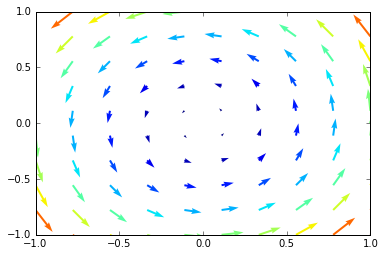

In [36]:
x = np.linspace(-1,1,10)
X, Y = np.meshgrid(x,x)
plt.quiver(X, Y, -Y, X, X**2+Y**2)
plt.quiver?

Uklad autonomiczny <=> trajektoria w przestrzeni fazowej jest stala

Trajektorie nie przecinaja sie przez przyczynowosc. To nie znaczy ze dwie trajektorie nie moga asymptotycznie zbiegac do tego samego stabilnego punktu stalego.

To oznacza ze trajektoria oscylatora harmonicznego (elipsa) zamyka w sobie wszystkie trajektorie podobne o mniejszej energii (nie wyjda na zewnatrz z tej elipsy).

### Dynamika geometryczna

Uklad rekurencyjny: zbliza sie dowolnie blisko stanu pierwotnego. Dowodzi sie przez indukcje ze bedzie dowolnie blisko znowu sie tam zblizal (niekoniecznie w ten sam punkt).

Transienty nie sa periodyczne\rekurencyjne. Ruchy w ukladzie Ziemia/Slonce/Ksiezyc - sa, po wygasnieciu transientow.

Podstawowe zachowanie rekurencyjne: trajektoria w przestrzeni fazowej polaczona krzywa "zamknieta"

uklad multistabilny: np. dwa atraktory w jednej przestrzeni, uklad zbiega do jednego, drugiego lub skacze pomiedzy nimi